In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [28]:
cd C:\Users\HP\Downloads

[WinError 3] The system cannot find the path specified: 'C:\\Users\\HP\\Downloads'
C:\Users\Subhasis Paul\Desktop


In [26]:
Stock_data=pd.read_csv("./Tesla Stock.csv",sep=',')
Stock_data.head(5)

,date,close,volume,open,high,low
0,17-10-2018,270.49,"47,87,699",264.50,273.88,262.2400
1,15-10-2018,259.59,6189026,259.06,263.28,254.5367
2,12-10-2018,258.78,7189257,261.00,261.99,252.0100
3,11-10-2018,252.23,8128184,257.53,262.25,249.0300
4,10-10-2018,256.88,12781560,264.61,265.51,247.7700


In [12]:
Stock_data.isnull().sum()

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

In [43]:
Stock_data.sort_values(by=["date"],inplace=True,ascending=True)
Stock_data.date.head()

683    01-02-2016
430    01-02-2017
178    01-02-2018
663    01-03-2016
411    01-03-2017
Name: date, dtype: object

In [6]:
df=pd.DataFrame(data=Stock_data)
df.head()

,date,close,volume,open,high,low
0,17-10-2018,270.49,"47,87,699",264.50,273.88,262.2400
1,15-10-2018,259.59,6189026,259.06,263.28,254.5367
2,12-10-2018,258.78,7189257,261.00,261.99,252.0100
3,11-10-2018,252.23,8128184,257.53,262.25,249.0300
4,10-10-2018,256.88,12781560,264.61,265.51,247.7700


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 683 to 703
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    757 non-null    object 
 1   close   757 non-null    float64
 2   volume  757 non-null    object 
 3   open    757 non-null    float64
 4   high    757 non-null    float64
 5   low     757 non-null    float64
dtypes: float64(4), object(2)
memory usage: 41.4+ KB


In [47]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of            date   close   volume    open      high     low
683  01-02-2016  196.94  5295685  188.76  199.5200  182.75
430  01-02-2017  249.24  3953105  253.05  253.2000  249.05
178  01-02-2018  349.25  4187440  351.00  359.6600  348.63
663  01-03-2016  186.35  6695704  194.25  195.9484  182.70
411  01-03-2017  250.02  4804963  254.18  254.8500  249.11
..          ...     ...      ...     ...       ...     ...
283  31-08-2017  355.90  4063330  353.55  358.4400  352.82
31   31-08-2018  301.66  5367048  302.00  305.3082  298.60
493  31-10-2016  197.73  4691320  202.49  202.4900  195.81
241  31-10-2017  331.53  5650062  320.23  331.9500  320.18
703  31-12-2015  240.01  2713817  238.51  243.4500  238.37

[757 rows x 6 columns]>

In [51]:
df.describe()

,close,open,high,low
count,757.000000,757.000000,757.000000,757.000000
mean,272.645614,272.760659,277.122776,268.017399
std,58.378585,58.449827,59.194761,57.515736
min,143.670000,142.320000,154.970000,141.050000
25%,219.560000,219.640000,222.569000,216.080000
50%,277.450000,277.625000,280.789900,273.550000
75%,322.690000,321.560000,327.120000,316.560100
max,385.000000,386.690000,389.610000,379.345000


In [22]:
df1=df.reset_index()["close"]
df1.head()

0    270.49
1    259.59
2    258.78
3    252.23
4    256.88
Name: close, dtype: float64

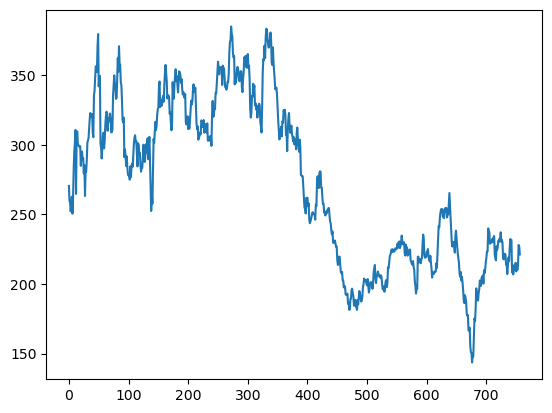

In [23]:
plt.plot(df1)

In [24]:
df2=df.reset_index()["high"]
df2.head()

0    273.88
1    263.28
2    261.99
3    262.25
4    265.51
Name: high, dtype: float64

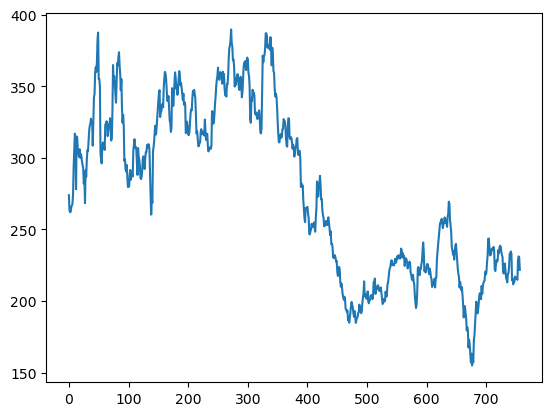

In [25]:
plt.plot(df2)

In [27]:
training_size=int(len(df1)*0.66)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(499, 258)

In [28]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i  in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
        return np.array(dataX),np.array(dataY)

In [29]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
X_test,Ytest=create_dataset(test_data,time_step)
print(x_train.shape),print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [30]:
print(X_test.shape),print(Ytest.shape)

(1, 100)
(1,)


(None, None)

In [33]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

C:\Users\Subhasis Paul\AppData\Local\Temp\ipykernel_14408\3441637186.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


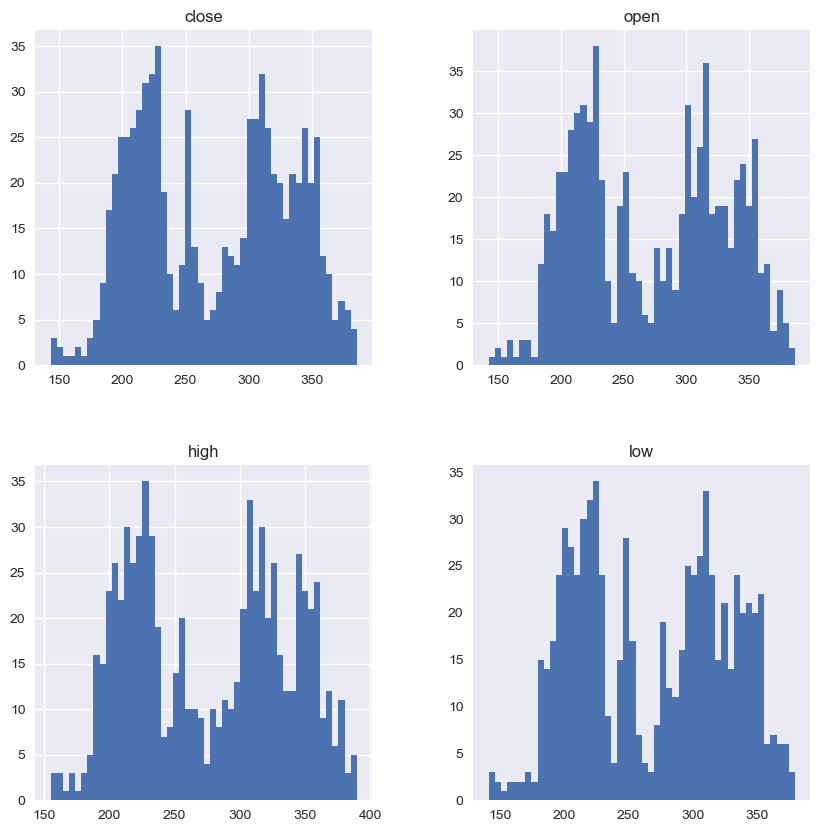

In [21]:
plt.style.use("seaborn")
df_copy.hist(bins=50,figsize=(10,10))
plt.grid()
plt.show()

<Axes: >

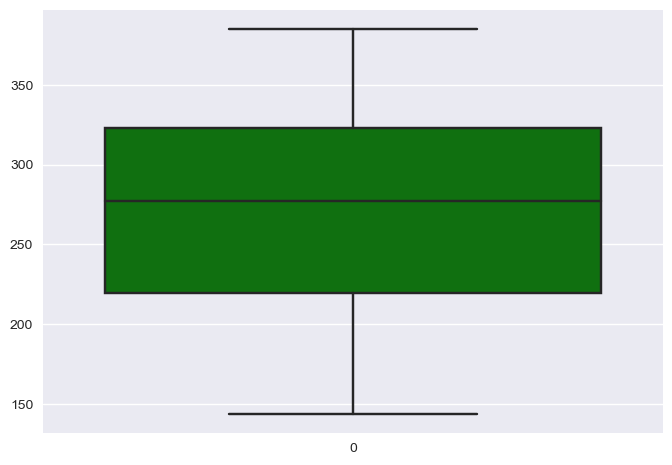

In [16]:
sns.boxplot(df["close"],color="green")

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
close_price=df["close"]
close_price=np.array(close_price).reshape(-1,1)
transformed_closed_value=scaler.fit_transform(close_price)
df=transformed_closed_value
df.shape

(757, 1)

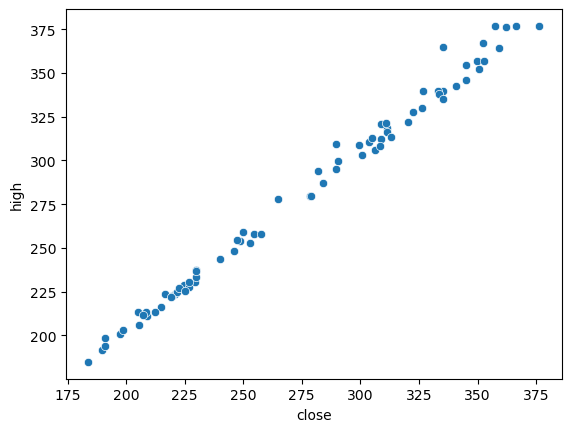

In [27]:
import seaborn as sns
sample=df.sample(frac=0.1,random_state=30)
sns.scatterplot(data=sample,x="close",y="high")
plt.show()

In [10]:
data=Stock_data.filter(["close"]).values
dataset=data.astype("float32")
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [11]:
training_data_len=int(np.ceil(0.8*len(dataset)))
train_data=scaled_data[0:training_data_len,:]

In [12]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [13]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [14]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
model=Sequential()
model.add(LSTM(unit=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer="adam",loss="mean_suared_error")

In [ ]:
model.fit(x_train,y_train,batch_size=1,epchos=1)

In [19]:
test_data=scaled_data[training_data_len-60:,:]

In [20]:
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [21]:
x_test=np.array(x_test)

In [22]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
rsme=np.sqrt(np.mean(prediction

In [35]:
train=Stock_data[:training_data_len]
valid=Stock_data[training_data_len:]


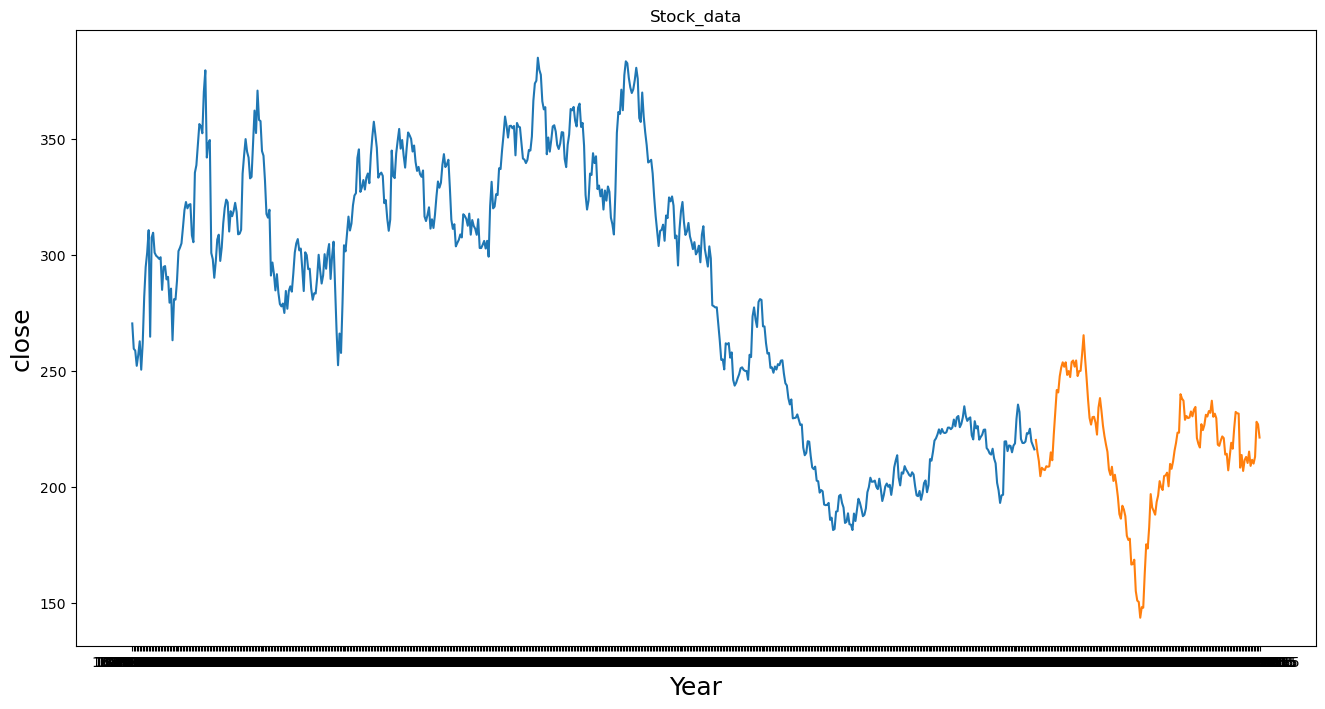

In [36]:
plt.figure(figsize=(16,8))
plt.title("Stock_data")
plt.xlabel("Year",fontsize=18)
plt.ylabel("close",fontsize=18)
plt.plot(train["date"],train["close"])
plt.plot(valid["date"],valid["close"])
plt.show()